In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from nltk.cluster import KMeansClusterer, cosine_distance

import json
from numpy.random import shuffle

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.decomposition import LatentDirichletAllocation

from scipy.cluster.hierarchy import cut_tree

from sklearn import metrics
import numpy as np

import csv

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity


In [8]:
#
with open("C:/Users/rajpu/Desktop/Web analytics Final/Data/final_data1.csv", "r") as f:
    reader=csv.reader(f, delimiter=',') 
    rows=[(row[1][2],row[1][4]) \
          for row in enumerate(reader)]
#rows
text,target=zip(*rows)
text=list(text)
target=list(target)


In [13]:
text,target=zip(*rows)


#date=list(Date)
#news=list(News)
#sent=list(Sentement)
#comp=list()


tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(text)
print (dtm.shape)

num_clusters=2
clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, repeats=10)
clusters = clusterer.cluster(dtm.toarray(), \
                            assign_clusters=True)


print(clusters[0:5])

centroids=np.array(clusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
voc_lookup= tfidf_vect.get_feature_names()

for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
    top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
    print("Cluster %d: %s " % (i, "; ".join(top_words)))

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)


cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}


# Assign true class to cluster
predicted_target=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_target))


(236, 4495)
[0, 1, 1, 0, 0]
Cluster 0: said; amazon; advertisement; percent; company; online; page; year; walmart; stores; airbus; google; companies; data; new; sales; business; market; service; million 
Cluster 1: mr; trump; said; percent; trade; nyt; china; tariffs; advertisement; new; billion; company; president; companies; investors; year; qualcomm; deal; million; wsj 


,actual_class,cluster
0,reviews are positive,0
1,reviews are positive,1
2,reviews are negative,1
3,reviews are positive,0
4,reviews are positive,0


actual_class,reviews are negative,reviews are positive
cluster,,
0,42,77
1,80,37


                      precision    recall  f1-score   support

reviews are negative       0.68      0.66      0.67       122
reviews are positive       0.65      0.68      0.66       114

         avg / total       0.67      0.67      0.67       236



In [14]:
# Kmeans with 10 different centroid seeds
km = KMeans(n_clusters=num_clusters, n_init=10).fit(dtm)
clusters = km.labels_.tolist()

df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
df.head()
pd.crosstab( index=df.cluster, columns=df.actual_class)

cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}

# Assign true class to cluster
predicted_clusters=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_clusters))

,actual_class,cluster
0,reviews are positive,0
1,reviews are positive,0
2,reviews are negative,0
3,reviews are positive,0
4,reviews are positive,0


actual_class,reviews are negative,reviews are positive
cluster,,
0,61,99
1,61,15


                      precision    recall  f1-score   support

reviews are negative       0.80      0.50      0.62       122
reviews are positive       0.62      0.87      0.72       114

         avg / total       0.71      0.68      0.67       236



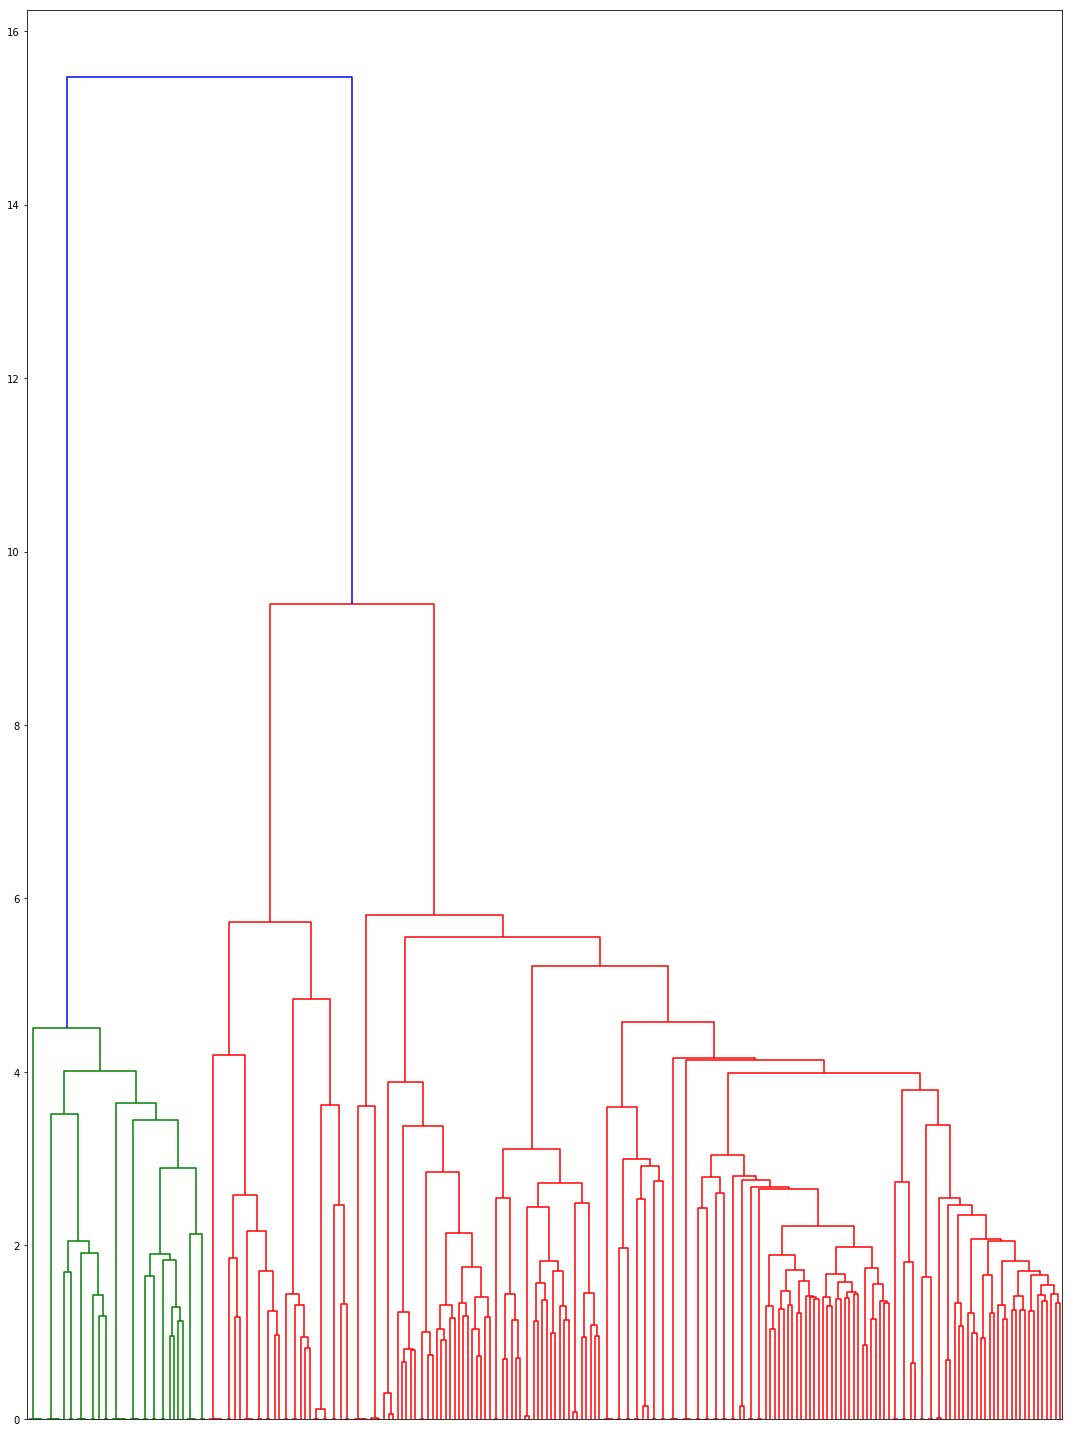

In [15]:
# distance between any pair of documents
dist = 1 - cosine_similarity(dtm)

# create a linkage matrix using ward's method
# the linkage matrix contains the dendragram data
# in ward methods, the distance between two clusters
# is measured as the sum of distance 
# from each sample to the cluster center 

#linkage_matrix = average(dist)
linkage_matrix = linkage(dist, method='ward')

# plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [16]:
cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}

# Assign true class to cluster
predicted_clusters=[cluster_dict[i] for i in clusters]

print(metrics.classification_report\
      (target, predicted_clusters))

                      precision    recall  f1-score   support

reviews are negative       0.80      0.50      0.62       122
reviews are positive       0.62      0.87      0.72       114

         avg / total       0.71      0.68      0.67       236

